Physics Informed Neural Networks - June 2024

* Dr. Mohammad Samara
* Udemy

1D Heat Equation - Mathematically modeling a heated aluminum rod

* Solving the equation notebook

In [35]:
# Python libraries
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Materials data
rod_length = 10
rod_mat_k = 0.89
# Boundary conditions
rod_temp_left = 100
rod_temp_right = 200
# Simulation period
sim_time = 10

In [37]:
# time array (~ vector)
dt = 0.0001
#t = np.arange(0, sim_time, dt) # Returns evenly spaced values within a given interval
t_vector = np.linspace(0, sim_time, int(sim_time/dt)) # Returns evenly spaced numbers over a specified interval
#print(type(t_vector))
print("time", t_vector)

# distance in x direction array (~ vector)
dx = 0.1
#x = np.arange(0, rod_length, dx) # Returns evenly spaced values within a given interval
x_vector = np.linspace(0, rod_length, int(rod_length/dx)) # Returns evenly spaced numbers over a specified interval
#print(type(x_vector))
print("distance in x direction", x_vector)

time [0.00000e+00 1.00001e-04 2.00002e-04 ... 9.99980e+00 9.99990e+00
 1.00000e+01]
distance in x direction [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.

Codeblock documentation
* numpy.arange https://numpy.org/doc/stable/reference/generated/numpy.arange.html
  * numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
  * Return evenly spaced values within a given interval
* numpy.linspace https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
  * numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
  * Return evenly spaced numbers over a specified interval
  * Returns num evenly spaced samples, calculated over the interval [start, stop]

In [38]:
# Initial conditions of u = heat equation solution = temperature
u = np.zeros([len(t_vector), len(x_vector)])  # Returns an array of zeros with the specified shape and type
shape = u.shape
print("u = heat equation solution shape in terms of steps in time and distance in x", shape)

u = heat equation solution shape in terms of steps in time and distance in x (100000, 100)


Codeblock documentation
* numpy.zeros https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
  * numpy.zeros(shape, dtype=float, order='C', *, like=None)
  * Return a new array of given shape and type, filled with zeros
* numpy.shape https://numpy.org/doc/stable/reference/generated/numpy.shape.html
  * numpy.shape(a)
  * Return the shape of an array

In [39]:
# Displays u (heat equation solution = temperature) in terms of columns and rows
u[:, 0] = rod_temp_left
u[:, -1] = rod_temp_right
print("u = heat equation solution", u)

u = heat equation solution [[100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 ...
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]]


Text(0.5, 1.0, 'Heat equation solution = temperature of rod')

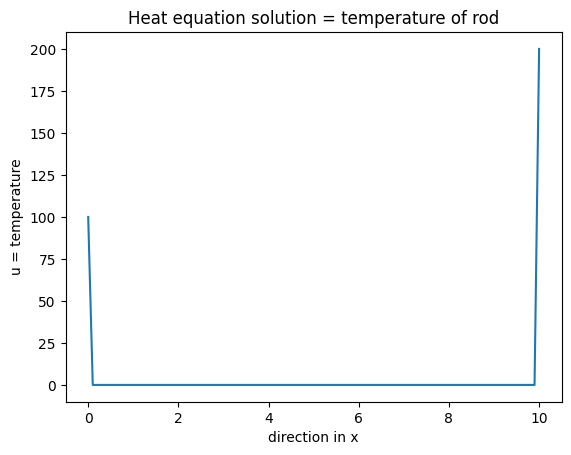

In [46]:
# Graphs the heat equation solution = temperature of rod along distance of rod
plt.plot(x_vector, u[0])
plt.xlabel("direction in x")
plt.ylabel("u = temperature")
plt.title("Heat equation solution = temperature of rod")
#plt.show()

Equation discretation is the conversion of a continuous mathematical equation into a discrete form suitable for numeric analysis.


We convert

  $\large\frac{du}{dt} = k\frac{du^2}{dx^2}$


...via these intermediaries

f''(x) ~ $\large\frac{f(x + h) - 2f(x) + f(x - h)}{h^2}$

f'(x) ~ $\large\frac{f(x + h) - f(x)}{h}$

... to this form

$\large\frac{u(t + dt, x) - u(t, x)}{dt} = \frac{u(t, x + dx) - 2u(t, x) + u(t, x - dx)}{dx^2}$

In [41]:
# Explict solution = start at an initial condition and then progress one time step at a time
for t in range(1, len(t_vector) - 1): # time step using the python convention of -1 in order to include the last element
  for x in range(1, len(x_vector) -1): # distance step using the python convention of -1 in order to include the last element
      u[t+1,x] = ((rod_mat_k*(dt/dx**2)) * (u[t,x+1] - 2*u[t,x] + u[t,x-1])) + u[t,x] # simulates what will happen in the future (ie t + 1) at this x location

In [42]:
u

array([[100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.89      ,   0.        , ...,   0.        ,
          1.78      , 200.        ],
       ...,
       [100.        ,  98.59123721,  97.1847561 , ..., 192.92058415,
        196.4589255 , 200.        ],
       [100.        ,  98.59125751,  97.1847967 , ..., 192.92063276,
        196.45894983, 200.        ],
       [100.        ,  98.59127782,  97.1848373 , ..., 192.92068138,
        196.45897415, 200.        ]])

In [48]:
print("number of steps", len(u))

number of steps 100000


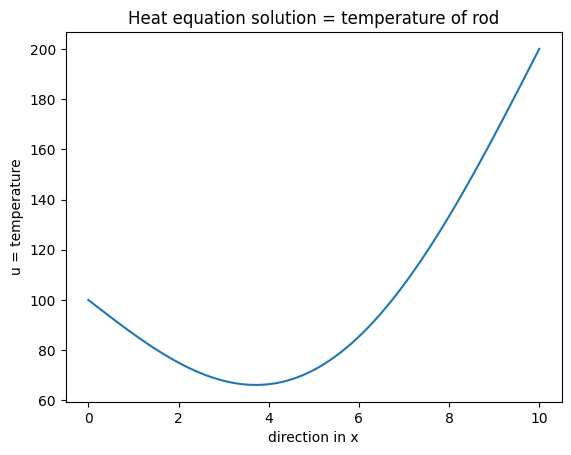

In [49]:
# Graphs the heat equation solution = temperature of rod along distance of rod
plt.plot(x_vector, u[99999])
plt.xlabel("direction in x")
plt.ylabel("u = temperature")
plt.title("Heat equation solution = temperature of rod")
plt.show()